In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split


In [4]:
pima_df = pd.read_csv("clean_data.csv")
pima_df

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [5]:
# Function to compute IQR and outliers
def calculate_outliers(df, column):
    q1 = pima_df.quantile(0.25)
    q3 = pima_df.quantile(0.75)
    iqr = q3 - q1
    
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    
    outliers = pima_df[(pima_df < lower_bound) | (pima_df > upper_bound)]
    return outliers, lower_bound, upper_bound, q1, q3, iqr

In [6]:
# Calculate outliers and plot boxplots for each column
# Select numeric columns
numeric_columns = pima_df.select_dtypes(include=[np.number]).columns

for column in numeric_columns:
    outliers, lower_bound, upper_bound, q1, q3, iqr = calculate_outliers(pima_df, column)

Outliers in column 'class':
     preg  plas  pres  skin  test  mass   pedi  age  class
0     NaN   NaN   NaN   NaN   NaN   NaN    NaN  NaN    NaN
1     NaN   NaN   NaN   NaN   NaN   NaN    NaN  NaN    NaN
2     NaN   NaN   NaN   NaN   NaN   NaN    NaN  NaN    NaN
3     NaN   NaN   NaN   NaN   NaN   NaN    NaN  NaN    NaN
4     NaN   NaN   NaN   NaN   NaN   NaN  2.288  NaN    NaN
..    ...   ...   ...   ...   ...   ...    ...  ...    ...
763   NaN   NaN   NaN   NaN   NaN   NaN    NaN  NaN    NaN
764   NaN   NaN   NaN   NaN   NaN   NaN    NaN  NaN    NaN
765   NaN   NaN   NaN   NaN   NaN   NaN    NaN  NaN    NaN
766   NaN   NaN   NaN   NaN   NaN   NaN    NaN  NaN    NaN
767   NaN   NaN   NaN   NaN   NaN   NaN    NaN  NaN    NaN

[768 rows x 9 columns]


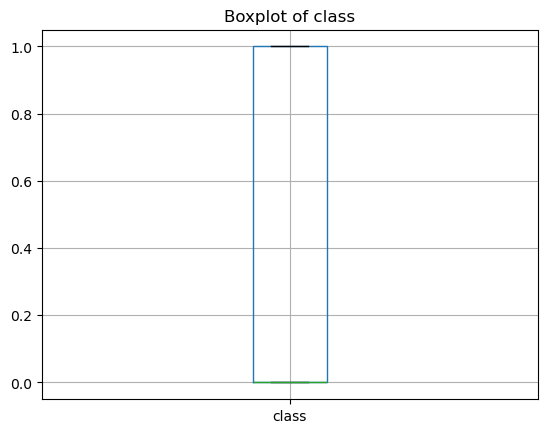

In [11]:
print(f"Outliers in column '{column}':")
print(outliers)

# Plot boxplot
pima_df.boxplot(column=column)
plt.title(f'Boxplot of {column}')
plt.show()

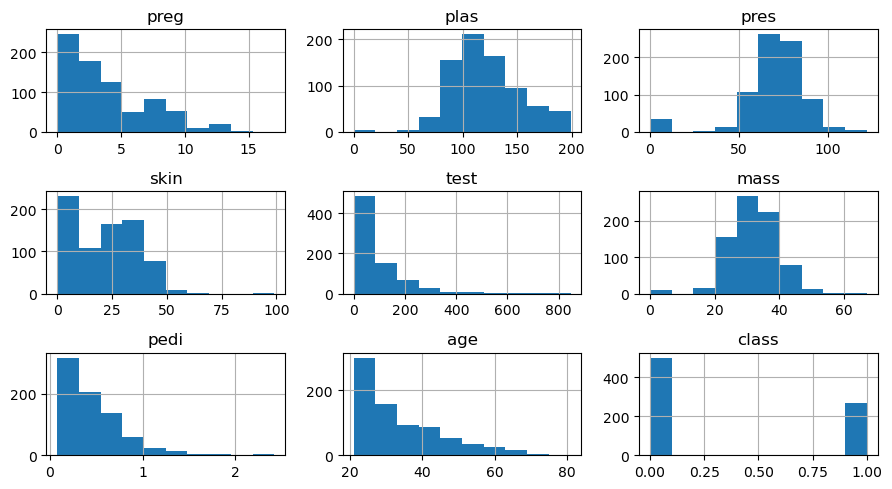

In [13]:
plt.rcParams['figure.figsize'] = [9,5]
pima_df.hist()
plt.tight_layout()
plt.show()

In [47]:
pima_df.to_csv('cleaned_data.csv', index=False)